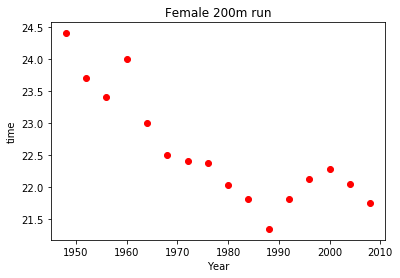

Text(0, 0.5, 'Winning time (in second)')

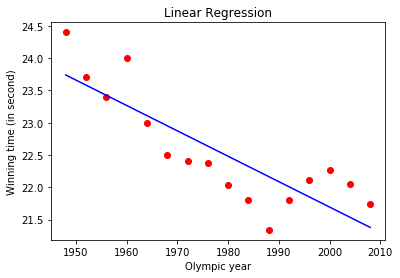

In [5]:
# Question no. 1 and 2

from IPython.display import IFrame
import pylab as plt
%matplotlib inline

import numpy as np
from numpy import genfromtxt
data = genfromtxt('female200.csv', delimiter=',')
x = data[:,0][:,None]
t = data[:,1][:,None]

plt.scatter(x, t, color = 'red')
plt.title('Female 200m run')
plt.xlabel('Year')
plt.ylabel('time')
plt.show()


X = np.hstack((np.ones_like(x),x))
t = t # This is already a vector!

# Linear Regression
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
#print (w)

testx = np.linspace(1948,2008,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,w)

plt.figure()
plt.plot(x,t,'ro')
plt.plot(testx,testt,'b')
plt.title('Linear Regression')
plt.xlabel('Olympic year')
plt.ylabel('Winning time (in second)')

In [6]:
# Question no.3


# Function to calculate average
def average(array):
    return sum(array) / len(array)

# Calculate average of both years and run_times
x_bar = average(x)
#print('x_bar:', x_bar)
t_bar = average(t)
#print('t_bar:', t_bar)

# average of time * year
xt_bar = average([x_i * t_i for x_i, t_i in zip(x, t)])
#print('xt_bar:', xt_bar)

# average of time** 
x2_bar = average([x_i ** 2 for x_i in x])
#print('x2_bar:', x2_bar)

# w1_hat is the coefficient of x (slope)
w1_hat = (xt_bar - t_bar*x_bar)/(x2_bar-x_bar*x_bar)
#print('w1_hat:', w1_hat)

# w0_hat is the y intercept
w0_hat = t_bar-w1_hat*x_bar
#print('w0_hat:', w0_hat)

#print in y = w0 + w1*x equation
#print('y = {} + {}x'.format(w0_hat,w1_hat))



# Computing Loss for the linear model
loss = 0
for time, target_year in zip(x,t):
    y_pred = w0_hat+w1_hat*time
    print(target_year,'\t', y_pred)
    loss += (target_year - y_pred)**2

avg_squared_loss = loss/len(x)

print ('Average squared loss: ', avg_squared_loss)

[24.4] 	 [23.73823529]
[23.7] 	 [23.58097059]
[23.4] 	 [23.42370588]
[24.] 	 [23.26644118]
[23.] 	 [23.10917647]
[22.5] 	 [22.95191176]
[22.4] 	 [22.79464706]
[22.37] 	 [22.63738235]
[22.03] 	 [22.48011765]
[21.81] 	 [22.32285294]
[21.34] 	 [22.16558824]
[21.81] 	 [22.00832353]
[22.12] 	 [21.85105882]
[22.27] 	 [21.69379412]
[22.05] 	 [21.53652941]
[21.74] 	 [21.37926471]
Average squared loss:  [0.21367695]


Average loss of 3rd degree polynomial equation:
 [[0.09731715]]


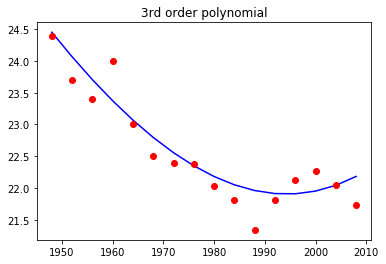

In [7]:
# Question no.3

X_3 = np.hstack((np.ones_like(x),x,x**2,x**3))
XX_3 = np.dot(X_3.T,X_3)
invXX_3 = np.linalg.inv(XX_3)
Xt_3 = np.dot(X_3.T,t)
w_3 = np.dot(invXX_3,Xt_3)
#print (w)

testx_3 = np.linspace(1948,2008,x.size)[:,None]
testX_3 = np.hstack((np.ones_like(testx_3),testx_3,testx_3**2,testx_3**3))
testt_3 = np.dot(testX_3,w_3)

plt.plot(testx_3,testt_3,'b')
plt.plot(x,t,'ro')
plt.title('3rd order polynomial')
# print (testX)
# print (testt)

#calculating year with 3rd form polynomial 
maxorder = 3
X_3 = np.ones_like(x)
for i in range(1,maxorder+1):
    X_3 = np.column_stack((X_3,np.power(x,i)))
#print(X_3)

#calculating w0 , w1, w3 
w3 = np.dot(np.linalg.inv(np.dot(X_3.T,X_3)),np.dot(X_3.T,t))
#print(w3)

#calculating the loss 
loss_3P = (t - np.dot(X_3, w3))
loss_t = loss_3P.T

#AVERGARE Polynomial Loss
avg_loss_polynomial = (np.dot(loss_t, loss_3P))/len(x)
print('Average loss of 3rd degree polynomial equation:\n',avg_loss_polynomial)

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]]
[[ 2.43230728e+01]
 [-6.35049893e-01]
 [ 2.14488469e-01]
 [-4.71367687e-02]
 [ 4.16775820e-03]
 [-1.22816941e-04]]


Text(0.5, 1.0, '5th order polynomial')

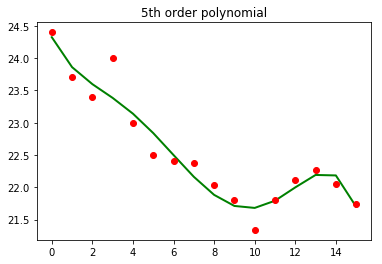

In [8]:
# Question no.4 and

# Changing Scale
x = np.array(x)
x = (x-1948)/4
print (x)

# Creating X (matrix) for 5th order polynomial
x_vector_5 = np.array(x)


maxorder = 5
X_5 = np.ones_like(x_vector_5)
for i in range(1,maxorder+1):
    X_5 = np.column_stack((X_5,np.power(x_vector_5,i)))


w_5 = np.dot(np.linalg.inv(np.dot(X_5.T,X_5)), np.dot(X_5.T, t))
print(w_5)

x_test_5 = np.linspace(0,15,x.size)[:,None]
X_test_5 = np.ones_like(x_test_5)
for i in range(1,maxorder+1):
    X_test_5 = np.column_stack((X_test_5,x_test_5**i))
# X_test = np.hstack((X_test,np.sin(x_test)))
f_test_5 = np.dot(X_test_5,w_5)


plt.plot(x_test_5,f_test_5,'g-',linewidth=2)
plt.plot(x,t,'ro')
plt.title('5th order polynomial')



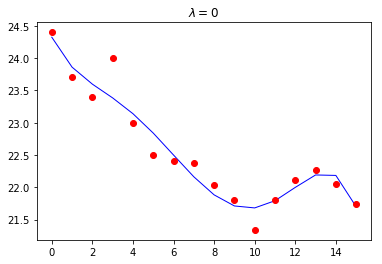

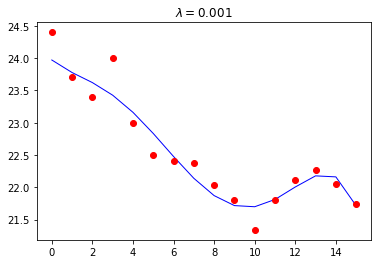

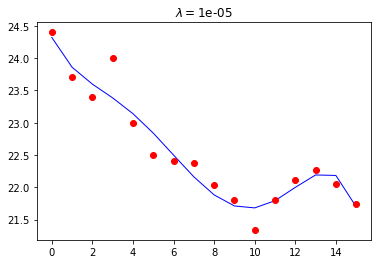

In [9]:
# Question 6

maxorder = 5
x_test_L = np.linspace(0,15,x.size)[:,None]
X_L = np.ones_like(x)
X_test_L = np.ones_like(x_test_L)
for i in range(1,maxorder+1):
    X_L = np.hstack((X_L,x**i))
    X_test_L = np.hstack((X_test_L,x_test_L**i))
    
for lamb in [0,0.001,0.00001]:
    w_L = np.linalg.solve(np.dot(X_L.T,X_L) + x.size*lamb*np.identity(maxorder+1),np.dot(X_L.T,t))
    f_test_L = np.dot(X_test_L,w_L)
    plt.figure()
    plt.plot(x_test_L,f_test_L,'b-',linewidth=1)
    plt.plot(x,t,'ro')
    title = '$\lambda=$%g'%lamb
    plt.title(title)
